In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras import layers

In [7]:
train_dir ="C:\\Users\\thesh\\Downloads\\archive (1) 2\\chest_xray\train"
test_dir = "C:\\Users\\thesh\\Downloads\\archive (1) 2\\chest_xray\test"
val_dir = "C:\\Users\\thesh\\Downloads\\archive (1) 2\\chest_xray\val"

In [8]:
img_height = 128
img_width = 128
batch_size =32

In [12]:
import os

train_dir = os.path.join('C:', os.sep, 'Users', 'thesh', 'Downloads', 'archive (1) 2', 'chest_xray', 'train')
val_dir = os.path.join('C:', os.sep, 'Users', 'thesh', 'Downloads', 'archive (1) 2', 'chest_xray', 'val')
test_dir = os.path.join('C:', os.sep, 'Users', 'thesh', 'Downloads', 'archive (1) 2', 'chest_xray', 'test')

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [13]:
train_ds.class_names

['NORMAL', 'PNEUMONIA']

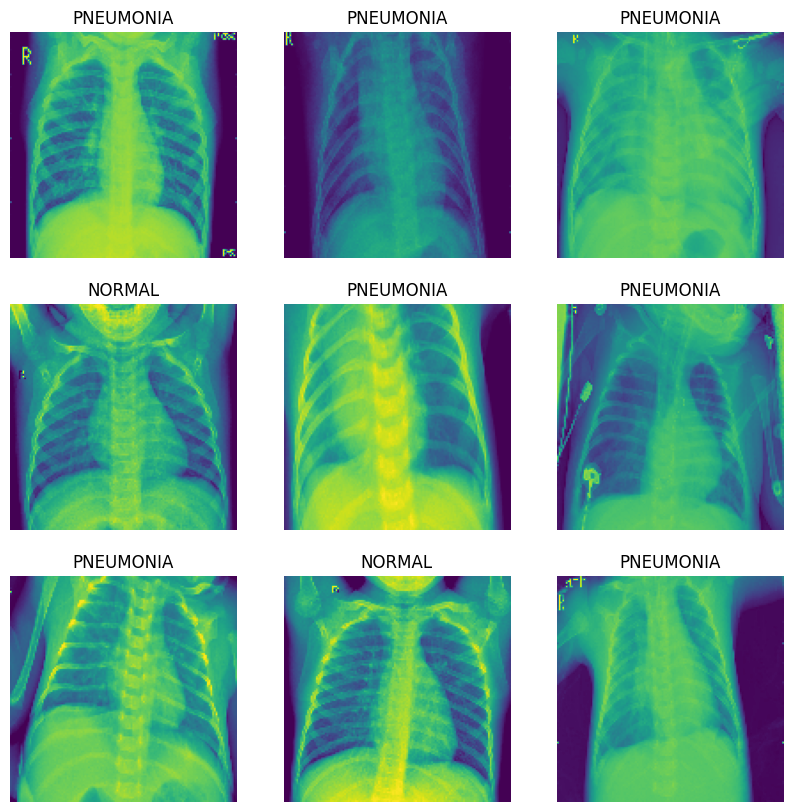

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [19]:
epochs = 10

In [20]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


c:\Users\thesh\miniconda3\envs\ml_env\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


163/163 ━━━━━━━━━━━━━━━━━━━━ 33s 187ms/step - accuracy: 0.8174 - loss: 0.3701 - val_accuracy: 0.8750 - val_loss: 0.3194
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.9634 - loss: 0.1027 - val_accuracy: 0.8125 - val_loss: 0.4505
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.9728 - loss: 0.0770 - val_accuracy: 0.7500 - val_loss: 0.3462
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.9773 - loss: 0.0697 - val_accuracy: 0.6875 - val_loss: 0.4738
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 102ms/step - accuracy: 0.9754 - loss: 0.0641 - val_accuracy: 0.9375 - val_loss: 0.1572
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.9779 - loss: 0.0606 - val_accuracy: 1.0000 - val_loss: 0.0904
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.9862 - loss: 0.0396 - val_accuracy: 1.0000 - val_loss: 0.0711
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.9867 - loss: 0.0366 - val

In [21]:
model.evaluate(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.7837 - loss: 1.3322


[1.2542694807052612, 0.7916666865348816]